In [10]:
import os
import argparse
import numpy as np
import time
import matplotlib.pyplot as pyplot

from main import run_direct_estimation, run_importance_sampling, run_adaptive_importance_sampling, run_multiple_grasps, run_single_grasp

In [11]:
# Define parameters for estimation methods
trial_size_increment = 250
max_trial_exp = 4
gui = False
hill = True
policy_file = '/Users/jazz/AA228VProjects/FPERG/src/best_hill_climbing_policy.pkl'
depth = 10

In [12]:
# Run direct estimation
# stores n, p_failure, std_error, runtime
results_de = {'n':[], 'p_fail':[], 'std_error':[], 'runtime':[]}
for i in range(max_trial_exp):
    start_time = time.time_ns()
    trials = trial_size_increment*(i + 1)
    p_failure_de, std_error_de = run_direct_estimation(
        trials, 
        gui,
        hill,  # Pass hill climbing flag
        policy_file if hill else None  # Pass policy file only if using hill climbing
    )
    end_time = time.time_ns()
    runtime_ns = end_time - start_time
    results_de['n'].append(trials)
    results_de['p_fail'].append(p_failure_de)
    results_de['std_error'].append(std_error_de)
    results_de['runtime'].append(runtime_ns)
    print(f"\nFinal Results:")
    print(f"Failure Probability: {p_failure_de:.4f} ± {std_error_de:.4f}")
    print(f"95% Confidence Interval: [{p_failure_de - 1.96*std_error_de:.4f}, {p_failure_de + 1.96*std_error_de:.4f}]")


Running direct estimation with 100 trials...
Using hill climbing policy
Loaded hill climbing policy from /Users/jazz/AA228VProjects/FPERG/src/best_hill_climbing_policy.pkl
Starting direct estimation with 100 trials...
Completed 0/100 trials...
Completed 50/100 trials...

Results:
Failure Probability: 0.0100 ± 0.0099
Based on 1 failures in 100 trials
Results saved to results/direct_estimation_results_hill_climbing.csv

Final Results:
Failure Probability: 0.0100 ± 0.0099
95% Confidence Interval: [-0.0095, 0.0295]

Running direct estimation with 200 trials...
Using hill climbing policy
Loaded hill climbing policy from /Users/jazz/AA228VProjects/FPERG/src/best_hill_climbing_policy.pkl
Starting direct estimation with 200 trials...
Completed 0/200 trials...
Completed 50/200 trials...
Completed 100/200 trials...
Completed 150/200 trials...

Results:
Failure Probability: 0.0100 ± 0.0070
Based on 2 failures in 200 trials
Results saved to results/direct_estimation_results_hill_climbing.csv

Fin

KeyboardInterrupt: 

In [ ]:
# Run importance sampling
# stores n, p_failure, std_error, runtime
results_ims = {'n':[], 'p_fail':[], 'std_error':[], 'runtime':[]}
for i in range(max_trial_exp):
    start_time = time.time_ns()
    trials = trial_size_increment*(i+1)
    failure_prob, std_error = run_importance_sampling(
            n_trials=trials,
            d=depth,
            gui_mode=gui,
            use_hill_climbing=hill,
            policy_file=policy_file if hill else None
        )
    end_time = time.time_ns()
    runtime_ns = end_time - start_time
    results_ims['n'].append(trials)
    results_ims['p_fail'].append(failure_prob)
    results_ims['std_error'].append(std_error)
    results_ims['runtime'].append(runtime_ns)
    print(f"\nFinal Results:")
    print(f"Estimated Failure Probability: {failure_prob:.4f}")
    print(f"95% Confidence Interval: [{failure_prob - 1.96*std_error:.4f}, {failure_prob + 1.96*std_error:.4f}]")


Running importance sampling with 10 trials and depth 10...
Loaded hill climbing policy from /Users/jazz/AA228VProjects/FPERG/src/best_hill_climbing_policy.pkl
Returned trajectory: [{'state': array([ 0.53208322, -0.00112025,  0.27629834,  0.54274599,  0.03365685,
       -0.15904727]), 'obs': array([ 0.40601796,  0.92125958,  1.5378145 , -0.06818732,  0.18158561,
        0.36283122]), 'action': array([-0.06813079, -0.1109511 , -0.14370783,  1.        ], dtype=float32), 'disturbance': array([-0.12606525,  0.92237983,  1.26151617, -0.6109333 ,  0.14792876,
        0.52187849]), 'done': False, 'success': False}, {'state': array([ 0.53208322, -0.00112035,  0.27629834,  0.54274822,  0.03365626,
       -0.15904643]), 'obs': array([-0.43547013, -0.85891901,  0.52175626,  0.39255337, -0.32911434,
       -1.33369619]), 'action': array([ 0.12720354,  0.07947071, -0.24577819,  1.        ], dtype=float32), 'disturbance': array([-0.96755336, -0.85779866,  0.24545792, -0.15019485, -0.3627706 ,
      

In [ ]:
# Run adaptive importance sampling
results_aims = {'n':[], 'p_fail':[], 'std_error':[], 'runtime':[]}
for i in range(max_trial_exp):
    start_time = time.time_ns()
    trials = trial_size_increment*(i+1)
    failure_prob, std_error = run_adaptive_importance_sampling(
            n_trials=trials,
            d=depth,
            gui_mode=gui,
            use_hill_climbing=hill,
            policy_file=policy_file if hill else None
        )
    end_time = time.time_ns()
    runtime_ns = end_time - start_time
    results_aims['n'].append(trials)
    results_aims['p_fail'].append(failure_prob)
    results_aims['std_error'].append(std_error)
    results_aims['runtime'].append(runtime_ns)
    print(f"\nFinal Results:")
    print(f"Estimated Failure Probability: {failure_prob:.4f}")
    print(f"95% Confidence Interval: [{failure_prob - 1.96*std_error:.4f}, {failure_prob + 1.96*std_error:.4f}]")


Running adaptive importance sampling with 10 trials and depth 10...
Loaded hill climbing policy from /Users/jazz/AA228VProjects/FPERG/src/best_hill_climbing_policy.pkl
Returned trajectory: [{'state': array([ 0.53208322, -0.00112025,  0.27629834,  0.52580979, -0.02334596,
       -0.15904998]), 'obs': array([-0.36474585,  0.9013608 ,  0.64330394,  0.19302081, -0.10211801,
       -0.99931704]), 'action': array([ 0.086665  , -0.15052181, -0.21385348,  1.        ], dtype=float32), 'disturbance': array([-0.89682907,  0.90248104,  0.3670056 , -0.33278898, -0.07877205,
       -0.84026706]), 'done': False, 'success': False, 'lifted': False, 'lift_duration': 0}, {'state': array([ 0.53208322, -0.00112035,  0.27629834,  0.52581235, -0.0233459 ,
       -0.15904871]), 'obs': array([ 1.73321698, -0.7272796 , -1.92367921,  0.76414536, -1.05313057,
        0.31176651]), 'action': array([-0.14236075, -0.04887766,  0.36785653,  1.        ], dtype=float32), 'disturbance': array([ 1.20113375, -0.72615926,

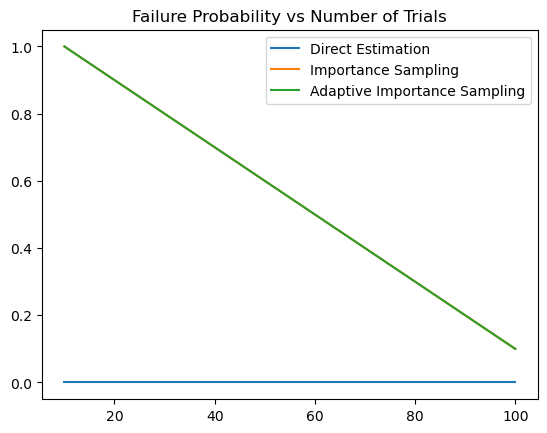

In [ ]:
# failure probability graph
pyplot.plot(results_de['n'], results_de['p_fail'])
pyplot.plot(results_ims['n'], results_ims['p_fail'])
pyplot.plot(results_aims['n'], results_aims['p_fail'])
pyplot.legend(["Direct Estimation", "Importance Sampling", "Adaptive Importance Sampling"])
pyplot.title("Failure Probability vs Number of Trials")
pyplot.show()